In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
os.listdir('data')

['Env_QH.csv',
 'micro_sud3.pkl',
 'AllPM_QH.csv',
 'micro_sud3_normalized.pkl',
 'AllNO2_QH.csv']

In [3]:
df = pd.read_pickle('data/micro_sud3_normalized.pkl')
df = df.reset_index()
df.head(100)

,index,date,PM_ref,PM_6182,PM_6179,PM_617B,PM25_6182,PM25_6179,PM25_617B,NO2_ref,NO2_61FD,NO2_61F0,NO2_61EF,temp,rh,tgrad,pressure,pluvio
0,15,2017-09-28 14:00:00,16.2,-1.178505,-1.137844,-1.134624,-1.183081,-1.128074,-1.148204,10.1,-0.392423,-0.621107,-0.419097,1.986031,-1.114144,-0.922393,0.315942,-0.150524
1,16,2017-09-28 14:15:00,9.6,-1.108262,-1.085060,-1.121956,-1.101652,-1.071229,-1.128278,9.9,-0.392423,-0.621107,-0.419097,2.057032,-1.123212,-0.977185,0.335134,-0.150524
2,17,2017-09-28 14:30:00,10.3,-1.178505,-1.169515,-1.257077,-1.176817,-1.167865,-1.252817,16.1,-0.392423,-0.621107,-0.419097,2.080699,-1.232038,-1.086769,0.315942,-0.150524
3,18,2017-09-28 14:45:00,9.4,-1.137530,-1.000606,-1.206407,-1.139235,-1.008700,-1.222928,10.9,-0.392423,-0.621107,-0.419097,2.009698,-1.259245,-0.812809,0.315942,-0.150524
4,19,2017-09-28 15:00:00,10.7,-1.166798,-1.164236,-1.138846,-1.164290,-1.167865,-1.148204,16.0,-0.392423,-0.621107,-0.419097,1.867697,-1.141350,-0.922393,0.315942,-0.150524
5,20,2017-09-28 15:15:00,10.7,-1.166798,-1.201185,-1.037506,-1.158026,-1.196288,-1.038610,9.7,-0.392423,-0.621107,-0.419097,1.749363,-1.050662,-0.867601,0.315942,-0.150524
6,21,2017-09-28 15:30:00,9.6,-1.078994,-1.169515,-1.007948,-1.070333,-1.162181,-0.998757,10.0,-0.392423,-0.621107,-0.419097,1.654695,-0.959974,-0.812809,0.315942,-0.150524
7,22,2017-09-28 15:45:00,10.2,-1.032164,-1.132566,-0.995280,-1.032750,-1.122389,-0.988794,19.1,-0.392423,-0.621107,-0.419097,1.583695,-0.887423,-0.758017,0.315942,-0.150524
8,23,2017-09-28 16:00:00,9.8,-1.043872,-1.095617,-0.910830,-1.039014,-1.093967,-0.919052,15.0,-0.392423,-0.621107,-0.419097,1.536361,-0.851148,-0.758017,0.315942,-0.150524
9,24,2017-09-28 16:15:00,8.9,-1.043872,-1.042833,-1.181072,-1.039014,-1.037122,-1.173112,19.4,-0.392423,-0.621107,-0.419097,1.489027,-0.851148,-0.703225,0.335134,-0.150524


In [4]:
df = df[['date', 'NO2_ref', 'NO2_61FD', 'NO2_61F0', \
        'NO2_61EF', 'temp', 'rh', 'tgrad', 'pressure', 'pluvio']]

# Premier modèle: simple DNN

In [5]:
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping

def baseline_model(dense_size, input_dim, loss='mean_squared_error', optimizer='adam'):
    # create model
    model = Sequential()
    model.add(Dense(dense_size, input_dim=input_dim, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal'))
    # Compile model
    model.compile(loss=loss, optimizer=optimizer)
    model.summary()
    return model

Using TensorFlow backend.


In [6]:
#df = df.reindex(np.random.permutation(df.index))

def split_dataframe(dataframe, percent):
    nb_rows = int(np.floor(percent * len(dataframe)))
    return dataframe[:nb_rows], dataframe[nb_rows:]

def dataframe_to_xy(df):
    return (np.array(df[['NO2_61FD', 'NO2_61F0', 'NO2_61EF', 'temp', 'rh',\
                         'tgrad', 'pressure', 'pluvio']]),\
            np.array(df['NO2_ref']))

df_train, df_test = split_dataframe(df, 0.5) 
df_valid, df_test = split_dataframe(df_test, 0.5)

X_train, y_train = dataframe_to_xy(df_train)
X_valid, y_valid = dataframe_to_xy(df_valid)
X_test, y_test = dataframe_to_xy(df_test)

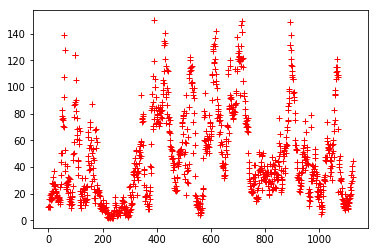

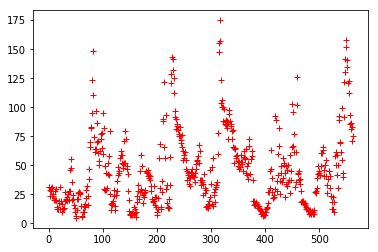

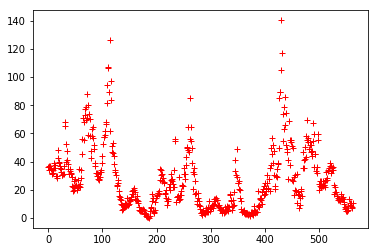

In [7]:
plt.plot(y_train, '+r')
plt.show()
plt.plot(y_valid, '+r')
plt.show()
plt.plot(y_test, '+r')
plt.show()

In [8]:
model = baseline_model(32, X_train.shape[1], 'mean_squared_error', 'adam')
early_stopping = EarlyStopping(monitor='val_loss', verbose=1, mode='auto', patience=10)
history = model.fit(X_train, y_train, batch_size=32, epochs=5000, validation_data=(X_valid, y_valid), callbacks=[early_stopping], verbose=1)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 32)                288       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 321
Trainable params: 321
Non-trainable params: 0
_________________________________________________________________
Train on 1126 samples, validate on 563 samples
Epoch 1/5000
1126/1126 [==============================] - 0s - loss: 3346.1888 - val_loss: 2999.9980
Epoch 2/5000
1126/1126 [==============================] - 0s - loss: 3315.8000 - val_loss: 2960.6578
Epoch 3/5000
1126/1126 [==============================] - 0s - loss: 3253.2551 - val_loss: 2886.1538
Epoch 4/5000
1126/1126 [==============================] - 0s - loss: 3142.4809 - val_loss: 2769.5892
Epoch 5/5000
1126/1126 [==============================] - 0s - loss: 2978.0090 - val_loss

1126/1126 [==============================] - 0s - loss: 112.9070 - val_loss: 160.2773
Epoch 77/5000
1126/1126 [==============================] - 0s - loss: 112.5582 - val_loss: 157.7104
Epoch 78/5000
1126/1126 [==============================] - 0s - loss: 112.1821 - val_loss: 157.1125
Epoch 79/5000
1126/1126 [==============================] - 0s - loss: 111.9014 - val_loss: 157.7619
Epoch 80/5000
1126/1126 [==============================] - 0s - loss: 111.6420 - val_loss: 156.3580
Epoch 81/5000
1126/1126 [==============================] - 0s - loss: 111.3089 - val_loss: 153.5511
Epoch 82/5000
1126/1126 [==============================] - 0s - loss: 111.0922 - val_loss: 154.0948
Epoch 83/5000
1126/1126 [==============================] - 0s - loss: 110.8524 - val_loss: 153.0431
Epoch 84/5000
1126/1126 [==============================] - 0s - loss: 110.5805 - val_loss: 150.8628
Epoch 85/5000
1126/1126 [==============================] - 0s - loss: 110.4362 - val_loss: 148.6962
Epoch 86/5000


1126/1126 [==============================] - 0s - loss: 93.9980 - val_loss: 122.2799
Epoch 158/5000
1126/1126 [==============================] - 0s - loss: 93.9492 - val_loss: 122.5310
Epoch 159/5000
1126/1126 [==============================] - 0s - loss: 93.5887 - val_loss: 121.4910
Epoch 160/5000
1126/1126 [==============================] - 0s - loss: 93.4855 - val_loss: 120.2756
Epoch 161/5000
1126/1126 [==============================] - 0s - loss: 93.1526 - val_loss: 121.6685
Epoch 162/5000
1126/1126 [==============================] - 0s - loss: 93.1090 - val_loss: 121.5678
Epoch 163/5000
1126/1126 [==============================] - 0s - loss: 92.7815 - val_loss: 120.2638
Epoch 164/5000
1126/1126 [==============================] - 0s - loss: 92.5525 - val_loss: 121.6175
Epoch 165/5000
1126/1126 [==============================] - 0s - loss: 92.3548 - val_loss: 120.0045
Epoch 166/5000
1126/1126 [==============================] - 0s - loss: 92.1518 - val_loss: 120.6542
Epoch 167/5000


1126/1126 [==============================] - 0s - loss: 81.8436 - val_loss: 110.7418
Epoch 240/5000
1126/1126 [==============================] - 0s - loss: 81.8199 - val_loss: 111.2513
Epoch 241/5000
1126/1126 [==============================] - 0s - loss: 81.5577 - val_loss: 110.6717
Epoch 242/5000
1126/1126 [==============================] - 0s - loss: 81.4911 - val_loss: 110.3261
Epoch 243/5000
1126/1126 [==============================] - 0s - loss: 81.3912 - val_loss: 109.7783
Epoch 244/5000
1126/1126 [==============================] - 0s - loss: 81.4311 - val_loss: 111.6253
Epoch 245/5000
1126/1126 [==============================] - 0s - loss: 80.9732 - val_loss: 109.5247
Epoch 246/5000
1126/1126 [==============================] - 0s - loss: 80.7856 - val_loss: 109.5100
Epoch 247/5000
1126/1126 [==============================] - 0s - loss: 80.6632 - val_loss: 107.9632
Epoch 248/5000
1126/1126 [==============================] - 0s - loss: 80.4575 - val_loss: 108.6886
Epoch 249/5000


1126/1126 [==============================] - 0s - loss: 67.7222 - val_loss: 99.8488
Epoch 322/5000
1126/1126 [==============================] - 0s - loss: 67.5001 - val_loss: 102.7048
Epoch 323/5000
1126/1126 [==============================] - 0s - loss: 67.3307 - val_loss: 102.0457
Epoch 324/5000
1126/1126 [==============================] - 0s - loss: 67.1220 - val_loss: 100.2536
Epoch 325/5000
1126/1126 [==============================] - 0s - loss: 67.3097 - val_loss: 101.9819
Epoch 326/5000
1126/1126 [==============================] - 0s - loss: 66.8338 - val_loss: 100.3923
Epoch 327/5000
1126/1126 [==============================] - 0s - loss: 66.8576 - val_loss: 101.5122
Epoch 328/5000
1126/1126 [==============================] - 0s - loss: 66.7335 - val_loss: 100.8192
Epoch 329/5000
1126/1126 [==============================] - 0s - loss: 66.6041 - val_loss: 100.0612
Epoch 330/5000
1126/1126 [==============================] - 0s - loss: 66.6287 - val_loss: 99.2843
Epoch 00329: earl

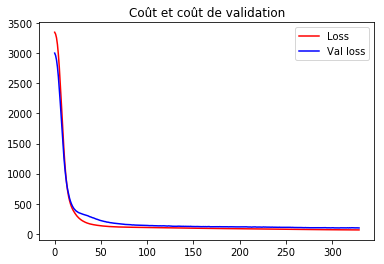

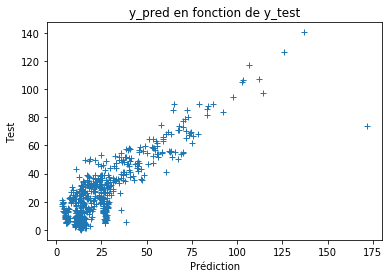

In [9]:
y_pred = model.predict(X_test)
plt.title('Coût et coût de validation')
line1,=plt.plot(history.history['loss'], label="Loss", linestyle='-', color='r')
line2,=plt.plot(history.history['val_loss'], label="Val loss", linestyle='-', color='b')
first_legend = plt.legend(handles=[line1, line2], loc=1)

plt.show()

plt.title('y_pred en fonction de y_test')

plt.plot(y_pred[:], y_test[:], '+')
plt.ylabel('Test')
plt.xlabel('Prédiction')
plt.show()

## DNN 2 Couches

In [10]:
from keras.layers import SimpleRNN

df = pd.read_pickle('data/micro_sud3_normalized.pkl')
df = df[['date', 'NO2_ref', 'NO2_61FD', 'NO2_61F0', \
        'NO2_61EF', 'temp', 'rh', 'tgrad', 'pressure', 'pluvio']]
df = df.reset_index()
df_train, df_test = split_dataframe(df, 0.5) 
df_valid, df_test = split_dataframe(df_test, 0.5)

X_train, y_train = dataframe_to_xy(df_train)
X_valid, y_valid = dataframe_to_xy(df_valid)
X_test, y_test = dataframe_to_xy(df_test)

def simple_rnn_model(nb_units, dense_size, loss='mean_squared_error', optimizer='adam'):
    model = Sequential()
    model.add(Dense(dense_size, input_dim=dense_size, kernel_initializer='normal', activation='relu'))
    model.add(Dense(dense_size//2, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal'))
    model.compile(loss=loss, optimizer=optimizer)
    model.summary()
    return model


model = simple_rnn_model(32, X_train.shape[1])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 8)                 72        
_________________________________________________________________
dense_4 (Dense)              (None, 4)                 36        
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 5         
Total params: 113
Trainable params: 113
Non-trainable params: 0
_________________________________________________________________


In [11]:
early_stopping = EarlyStopping(monitor='val_loss', verbose=1, mode='auto', patience=10)
history = model.fit(X_train, y_train, batch_size=32, epochs=5000, validation_data=(X_valid, y_valid), callbacks=[early_stopping], verbose=1)

Train on 1126 samples, validate on 563 samples
Epoch 1/5000
1126/1126 [==============================] - 0s - loss: 3350.9106 - val_loss: 3012.2725
Epoch 2/5000
1126/1126 [==============================] - 0s - loss: 3345.0514 - val_loss: 3004.1835
Epoch 3/5000
1126/1126 [==============================] - 0s - loss: 3331.3340 - val_loss: 2985.7127
Epoch 4/5000
1126/1126 [==============================] - 0s - loss: 3300.9435 - val_loss: 2948.7876
Epoch 5/5000
1126/1126 [==============================] - 0s - loss: 3245.2318 - val_loss: 2884.0960
Epoch 6/5000
1126/1126 [==============================] - 0s - loss: 3151.3767 - val_loss: 2781.0195
Epoch 7/5000
1126/1126 [==============================] - 0s - loss: 3012.6229 - val_loss: 2638.2028
Epoch 8/5000
1126/1126 [==============================] - 0s - loss: 2820.4767 - val_loss: 2448.2792
Epoch 9/5000
1126/1126 [==============================] - 0s - loss: 2581.5472 - val_loss: 2216.1716
Epoch 10/5000
1126/1126 [===================

1126/1126 [==============================] - 0s - loss: 112.5832 - val_loss: 145.1821
Epoch 83/5000
1126/1126 [==============================] - 0s - loss: 112.2391 - val_loss: 145.1640
Epoch 84/5000
1126/1126 [==============================] - 0s - loss: 111.9592 - val_loss: 143.0483
Epoch 85/5000
1126/1126 [==============================] - 0s - loss: 111.8574 - val_loss: 141.6068
Epoch 86/5000
1126/1126 [==============================] - 0s - loss: 111.4195 - val_loss: 141.4661
Epoch 87/5000
1126/1126 [==============================] - 0s - loss: 111.1705 - val_loss: 140.0707
Epoch 88/5000
1126/1126 [==============================] - 0s - loss: 110.8975 - val_loss: 138.8633
Epoch 89/5000
1126/1126 [==============================] - 0s - loss: 110.7367 - val_loss: 138.6879
Epoch 90/5000
1126/1126 [==============================] - 0s - loss: 110.5319 - val_loss: 138.8748
Epoch 91/5000
1126/1126 [==============================] - 0s - loss: 110.3369 - val_loss: 139.1124
Epoch 92/5000


1126/1126 [==============================] - 0s - loss: 105.3871 - val_loss: 118.3845
Epoch 164/5000
1126/1126 [==============================] - 0s - loss: 105.4819 - val_loss: 118.6544
Epoch 165/5000
1126/1126 [==============================] - 0s - loss: 105.2350 - val_loss: 119.0048
Epoch 166/5000
1126/1126 [==============================] - 0s - loss: 105.4929 - val_loss: 120.1452
Epoch 167/5000
1126/1126 [==============================] - 0s - loss: 105.6133 - val_loss: 118.7227
Epoch 168/5000
1126/1126 [==============================] - 0s - loss: 105.2733 - val_loss: 118.2638
Epoch 169/5000
1126/1126 [==============================] - 0s - loss: 105.2082 - val_loss: 118.7247
Epoch 170/5000
1126/1126 [==============================] - 0s - loss: 105.2262 - val_loss: 118.4108
Epoch 171/5000
1126/1126 [==============================] - 0s - loss: 105.1348 - val_loss: 117.4294
Epoch 172/5000
1126/1126 [==============================] - 0s - loss: 105.1062 - val_loss: 118.0067
Epoch

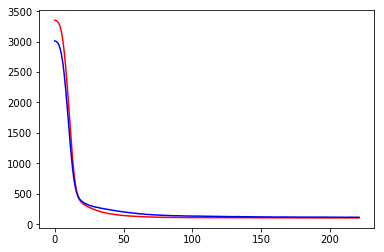

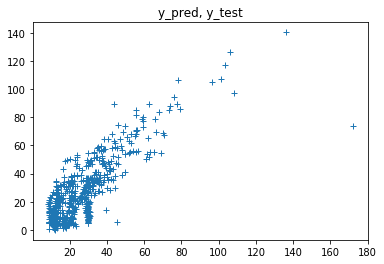

1.10299003322


In [12]:
y_pred = model.predict(X_test)
plt.plot(history.history['loss'], 'r-')
plt.plot(history.history['val_loss'], 'b-')
plt.show()

plt.title('y_pred, y_test')

plt.plot(y_pred[:], y_test[:], '+')
plt.show()
percent_high_detected = np.sum(y_pred.reshape((len(y_pred), )) > 20) / np.sum(y_test.reshape((len(y_test), )) > 20)
print(percent_high_detected)

In [13]:
import matplotlib.pyplot as plt

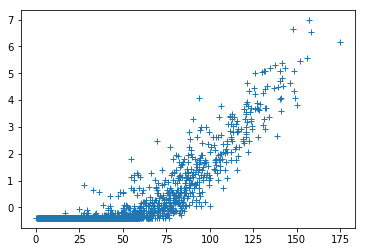

In [14]:
plt.plot(df['NO2_ref'], df['NO2_61FD'], '+')

In [15]:
plt.show()